### Monte Carlo Profit Projection for Melon

***
<font size="2.5">This notebook is aimed to provide a clear picture of the revenue projection of our school project, a web application which converts lyrics to melodies called Melon. The web application will assist those intimidated by the difficulty of composing in creating their original music just by simply inputting text information, preferrably lyrics. Melon will use a conditional LSTM-GAN model to generate melodies. If you are interested in the model, more information can be found at https://arxiv.org/pdf/1908.05551.pdf.

<br/> I am greatly inspired by Tony Yiu's Medium post "Business Simulations With Python" and want to implement this revenue projection to support my business analysis. In his post, Tony provided great details about simulating the customer acquisition cost and customer lifetime value. I made assumptions specifically tailored to our business plan and adjusted Tony's function so that it can hold more granular details of Melon's revenue streams. </font>

***

In [95]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
def get_conversion_rate(expected, stdev):
    # Assume the actual conversion rate has a normal distribution
    # we input expected value and standard deviation to simulate the actual values
    # because negative conversion rate not reasonable, thus a floor for the number
    conversion_rate = max(expected + np.random.normal()*stdev, 0.000001)
    return conversion_rate

In [97]:
def run_campaign(spend, cpimp, conversion_rate):
    # cpimp is the cost per 1000 impressions we made through channels like Facebook and Google
    return np.random.binomial(spend/cpimp*1000, conversion_rate)

In [98]:
# here we made a bunch of assumptions that will support our analysis
# Budget -- how much money we are willing to invest in marketing
spend = 50000
# Cost per thousand of ad impressions
cpimp = 2
# Conversion rate -- assume for 10000 impressions we get 1 customers
conversion_rate_expected = 0.0001
conversion_rate_stdev = 0.00005

conversion_rate = get_conversion_rate(conversion_rate_expected, conversion_rate_stdev)
cohort_size = run_campaign(spend, cpimp, conversion_rate)
CAC = spend/cohort_size

print('Customers Gained: ', cohort_size)
print('Customer Acquisition Cost: ', int(CAC))

Customers Gained:  2146
Customer Acquisition Cost:  23


In [104]:
# The number of customers our product will have across time
# assume the quarterly plan and annual plan customer leave at the end of their subscription period


def simulate_cohort(cohort_size_monthly_pro, cohort_size_monthly_reg,
                    cohort_size_quarterly_pro, cohort_size_quarterly_reg,
                    cohort_size_annually_pro, cohort_size_annually_reg,
                    month_price_pro, month_price_reg, quarter_price_pro,
                    quarter_price_reg, annual_price_pro, annual_price_reg,
                    month_retention_cost_pro, month_retention_cost_reg,
                    quarter_retention_cost_pro, quarter_retention_cost_reg,
                    annual_retention_cost_pro, annual_retention_cost_reg,
                    churn_rate, months=24):

    month_churn = []
    month_return = []
    quarter_churn = []
    quarter_return = []
    annual_churn = []

    customers = []
    customers_left = []
    revenue = []
    profit = []
    for i in range(months):

        month_churn_pro = 0
        month_churn_reg = 0
        month_return_pro = 0
        month_return_reg = 0

        if i in list(range(months))[1:]:
            for customer in range(cohort_size_monthly_pro):

                # if the random number is less than churn_rate,
                # we say the customer has churned and we reduce our cohort size
                churn_random_num_monthly = np.random.random()

                if churn_random_num_monthly <= churn_rate:
                    cohort_size_monthly_pro += -1
                    month_churn_pro += 1

            for customer in range(cohort_size_monthly_reg):

                churn_random_num_monthly = np.random.random()

                if churn_random_num_monthly <= churn_rate:
                    cohort_size_monthly_reg += -1
                    month_churn_reg += 1

        if i in list(range(months))[2:]:
            for customer in range(month_churn_pro):
                return_random_num_monthly = np.random.random()
                if return_random_num_monthly <= return_rate:
                    cohort_size_monthly_pro += 1
                    month_churn_pro += -1
                    month_return_pro += 1

            for customer in range(cohort_size_monthly_reg):
                return_random_num_monthly = np.random.random()
                if return_random_num_monthly <= return_rate:
                    cohort_size_monthly_reg += 1
                    month_churn_reg += -1
                    month_return_reg += 1

        month_churn.append((month_churn_pro,  month_churn_reg))
        month_return.append((month_return_pro, month_return_reg))

        # for our quarterly customers
        if i in list(range(3, 25, 3)):

            quarter_churn_pro = 0
            quarter_churn_reg = 0
            quarter_return_pro = 0
            quarter_return_reg = 0

            for customer in range(cohort_size_quarterly_pro):
                # same logic for our quarterly plan pro subscriber
                churn_random_num_quarterly = np.random.random()

                if churn_random_num_quarterly <= churn_rate:
                    cohort_size_quarterly_pro += -1
                    quarter_churn_pro += 1

            for customer in range(cohort_size_quarterly_reg):
                # quarterly plan regular subscriber
                churn_random_num_quarterly = np.random.random()

                if churn_random_num_quarterly <= churn_rate:
                    cohort_size_quarterly_reg += -1
                    quarter_churn_reg += 1

            if i in list(range(3, 25, 3))[1:]:
                for customer in range(quarter_churn_pro):
                    # same logic for our quarterly plan pro subscriber
                    return_random_num_quarterly = np.random.random()

                    if return_random_num_quarterly <= return_rate:
                        cohort_size_quarterly_pro += 1
                        quarter_churn_pro += -1
                        quarter_return_pro += 1

                for customer in range(quarter_churn_reg):
                    # same logic for our quarterly plan pro subscriber
                    return_random_num_quarterly = np.random.random()

                    if return_random_num_quarterly <= return_rate:
                        cohort_size_quarterly_reg += 1
                        quarter_churn_reg += -1
                        quarter_return_reg += 1

            quarter_churn.append((quarter_churn_pro,  quarter_churn_reg))
            quarter_return.append((quarter_return_pro, quarter_return_reg))

        # for our annual customers
        if i in list(range(12, 25, 12)):

            annual_churn_pro = 0
            annual_churn_reg = 0

            for customer in range(cohort_size_annually_pro):
                # same logic for our quarterly plan subscriber
                churn_random_num_annually = np.random.random()

                if churn_random_num_annually <= churn_rate:
                    cohort_size_annually_pro += -1
                    annual_churn_pro += 1

            for customer in range(cohort_size_annually_reg):
                # same logic for our quarterly plan subscriber
                churn_random_num_annually = np.random.random()

                if churn_random_num_annually <= churn_rate:
                    cohort_size_annually_reg += -1
                    annual_churn_reg += 1

            annual_churn.append((annual_churn_pro,  annual_churn_reg))

        customers.append((cohort_size_monthly_pro, cohort_size_monthly_reg,
                          cohort_size_quarterly_pro, cohort_size_quarterly_reg,
                          cohort_size_annually_pro, cohort_size_annually_reg))
        customers_left.append(cohort_size_monthly_pro + cohort_size_monthly_reg +
                              cohort_size_quarterly_pro + cohort_size_quarterly_reg +
                              cohort_size_annually_pro + cohort_size_annually_reg)
        revenue.append(cohort_size_monthly_pro*month_price_pro +
                       cohort_size_monthly_reg*month_price_reg +
                       cohort_size_quarterly_pro*quarter_price_pro +
                       cohort_size_quarterly_reg*quarter_price_reg +
                       cohort_size_annually_pro*annual_price_pro +
                       cohort_size_annually_reg*annual_price_reg)
        profit.append(cohort_size_monthly_pro*(month_price_pro - month_retention_cost_pro) +
                      cohort_size_monthly_reg*(month_price_reg - month_retention_cost_reg) +
                      cohort_size_quarterly_pro*(quarter_price_pro - quarter_retention_cost_pro) +
                      cohort_size_quarterly_reg*(quarter_price_reg - quarter_retention_cost_reg) +
                      cohort_size_annually_pro*(annual_price_pro - annual_retention_cost_pro) +
                      cohort_size_annually_reg*(annual_price_reg - annual_retention_cost_reg))

    return month_return, month_churn, quarter_return, quarter_churn, annual_churn, customers, customers_left, revenue, profit



***
In our business plan, we aim to provide a one-month, three-month, and one-year subscription plan for regular users and professional users respectively
***

In [105]:
# Here are the assumptions we made for the projection
cohort_size_monthly = int(cohort_size*0.6)
cohort_size_quarterly = int(cohort_size*0.25)
cohort_size_annually = int(cohort_size*0.15)
cohort_size_monthly_pro = int(cohort_size_monthly*0.2)
cohort_size_monthly_reg = int(cohort_size_monthly*0.8)
cohort_size_quarterly_pro = int(cohort_size_quarterly*0.25)
cohort_size_quarterly_reg = int(cohort_size_quarterly*0.75)
cohort_size_annually_pro = int(cohort_size_annually*0.3)
cohort_size_annually_reg = int(cohort_size_annually*0.7)
month_price_pro = 15
month_price_reg = 10
quarter_price_pro = 30
quarter_price_reg = 20
annual_price_pro = 90
annual_price_reg = 60
month_retention_cost_pro = 5
month_retention_cost_reg = 5
quarter_retention_cost_pro = 12
quarter_retention_cost_reg = 8
annual_retention_cost_pro = 25
annual_retention_cost_reg = 20
churn_rate = 0.30
return_rate = 0.10
months=24

In [107]:
month_return, month_churn, quarter_return, quarter_churn, annual_churn, customers, customers_left, revenue, profit = simulate_cohort(cohort_size_monthly_pro, cohort_size_monthly_reg, 
                    cohort_size_quarterly_pro, cohort_size_quarterly_reg, 
                    cohort_size_annually_pro, cohort_size_annually_reg,
                    month_price_pro, month_price_reg, quarter_price_pro,
                    quarter_price_reg, annual_price_pro, annual_price_reg,
                    month_retention_cost_pro, month_retention_cost_reg,
                    quarter_retention_cost_pro, quarter_retention_cost_reg,
                    annual_retention_cost_pro, annual_retention_cost_reg,
                    churn_rate, months=24)

In [119]:
quarter_return

[(0, 0), (2, 13), (3, 6), (1, 5), (1, 0), (0, 4), (0, 2)]

In [121]:
quarter_churn

[(40, 112), (29, 75), (21, 62), (17, 43), (11, 35), (7, 24), (2, 15)]

In [122]:
annual_churn

[(25, 53)]

In [123]:
quarter_churn

[(40, 112), (29, 75), (21, 62), (17, 43), (11, 35), (7, 24), (2, 15)]

In [124]:
customers

[(257, 1029, 134, 402, 96, 224),
 (175, 696, 134, 402, 96, 224),
 (138, 517, 134, 402, 96, 224),
 (101, 379, 94, 290, 96, 224),
 (73, 280, 94, 290, 96, 224),
 (53, 228, 94, 290, 96, 224),
 (42, 168, 65, 215, 96, 224),
 (30, 137, 65, 215, 96, 224),
 (19, 114, 65, 215, 96, 224),
 (16, 96, 44, 153, 96, 224),
 (9, 77, 44, 153, 96, 224),
 (6, 60, 44, 153, 96, 224),
 (5, 42, 27, 110, 71, 171),
 (4, 26, 27, 110, 71, 171),
 (2, 23, 27, 110, 71, 171),
 (1, 15, 16, 75, 71, 171),
 (1, 15, 16, 75, 71, 171),
 (1, 11, 16, 75, 71, 171),
 (1, 9, 9, 51, 71, 171),
 (1, 6, 9, 51, 71, 171),
 (1, 7, 9, 51, 71, 171),
 (1, 7, 7, 36, 71, 171),
 (1, 6, 7, 36, 71, 171),
 (1, 2, 7, 36, 71, 171)]

In [126]:
# Function to calculate the present value of a set of cashflows
def present_value(cashflows, rate):
    pv = []
    for i, val in enumerate(cashflows):
        pv.append(val/(1 + rate)**(i+1))
    return pv

# Calculate Customer Long Term Value
# assume monthly interest rate as 0.015
rate = 0.015

# Get the PV of the profits
pv = present_value(profit, rate)
# Value of the cohort in today's dollars is sum of PVs
cohort_value = sum(pv)

print('Total Cohort Value: ', int(cohort_value))
print('Customer Long Term Value: ', int(cohort_value/cohort_size))
print('Customer Long Term Value - Customer Acquisition Cost Spread: ', int(cohort_value/cohort_size - CAC))

Total Cohort Value:  359996
Customer Long Term Value:  167
Customer Long Term Value - Customer Acquisition Cost Spread:  144


In [129]:
round(cohort_value,2)

359996.39

In [131]:
pv

[29705.418719211826,
 26854.327938071787,
 25247.724951756805,
 21931.22232838408,
 20887.713842277706,
 20158.33900747893,
 18209.75143919822,
 17696.521252972678,
 17238.213054302916,
 15913.2704354453,
 15538.024967695706,
 15212.214429433465,
 11141.669292066652,
 10903.947645880335,
 10714.810759771837,
 10030.059068465107,
 9881.831594546906,
 9720.496442698157,
 9257.314216722732,
 9109.369561187465,
 8978.40582589023,
 8690.051496461696,
 8558.076904718559,
 8417.611983401588]

***
Assume we only performed one marketing campaign and do not conduct additional campaigns in this two year period.
***

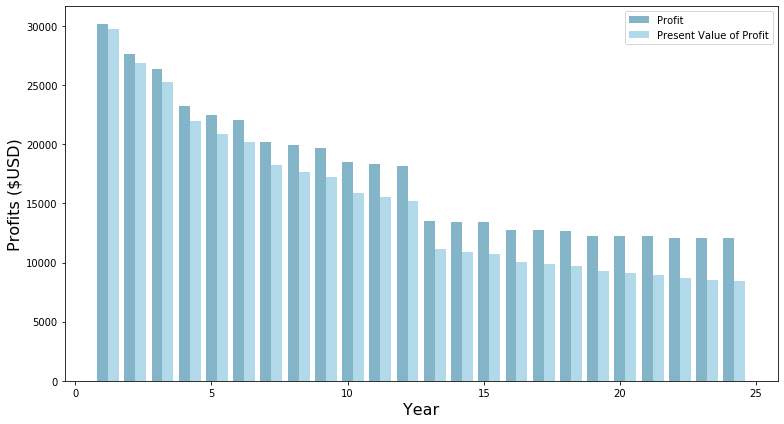

In [132]:
# Bar chart for profit and its PV
fig, ax = plt.subplots(figsize=(11,6))
plt.bar(x=[i-0.2 for i in range(1,25)], height=profit, width=0.4, label='Profit', color='#84B4C8', align='edge')
plt.bar(x=[i+0.2 for i in range(1,25)], height=pv, width=0.4, label='Present Value of Profit', color='#B2D9EA', align='edge')

ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("Profits ($USD)",fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='profit_bar', dpi=150)
plt.show()

In [274]:
# Simulate 1000 times and look at the distributions

cohort_size_list = []
CAC_list = []
CLTV_list = []

for i in range(1000):
    
    # marketing campaign conversion simulation which follows normal distribution
    conversion_rate = get_conversion_rate(conversion_rate_expected, 
                                      conversion_rate_stdev)
    cohort_size = run_campaign(spend, cpimp, conversion_rate)
    CAC = spend/cohort_size
    
    # Simulate the resulting cohort
    customers_left, revenue, profit = simulate_cohort(cohort_size_monthly_pro, cohort_size_monthly_reg, 
                    cohort_size_quarterly_pro, cohort_size_quarterly_reg, 
                    cohort_size_annually_pro, cohort_size_annually_reg,
                    month_price_pro, month_price_reg, quarter_price_pro,
                    quarter_price_reg, annual_price_pro, annual_price_reg,
                    month_retention_cost_pro, month_retention_cost_reg,
                    quarter_retention_cost_pro, quarter_retention_cost_reg,
                    annual_retention_cost_pro, annual_retention_cost_reg,
                    churn_rate, months=24)
    
    cohort_value = sum(present_value(profit, rate))
    
    cohort_size_list.append(cohort_size)
    CAC_list.append(CAC)
    CLTV_list.append(cohort_value/cohort_size)
    
# Store simulation results in a dataframe
results_df = pd.DataFrame()
results_df['initial_cohort_size'] = cohort_size_list
results_df['CLTV'] = CLTV_list
results_df['CAC'] = CAC_list
results_df['Spread'] = results_df['CLTV'] - results_df['CAC']

plot_df = results_df[results_df['CAC']<=1000]

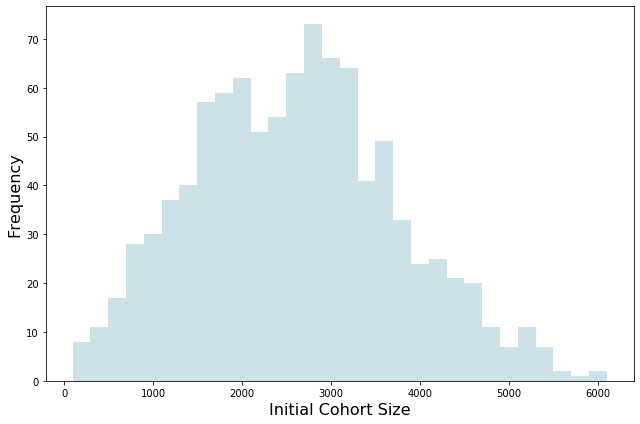

In [275]:
# Histogram for distribution of initial cohort size
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['initial_cohort_size'], kde=False, bins=30, color='#84B4C8')

ax.set_xlabel("Initial Cohort Size",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='cohort_hist', dpi=150)
plt.show()

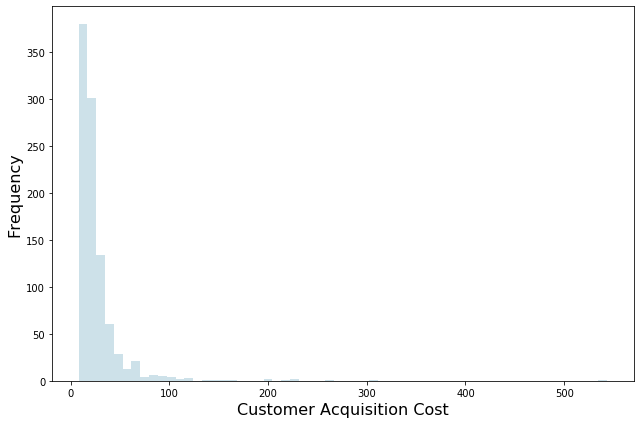

In [276]:
# Histogram for distribution of initial cohort size
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['CAC'], kde=False, bins=60, color='#84B4C8')

ax.set_xlabel("Customer Acquisition Cost",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='CAC_hist', dpi=150)
plt.show()

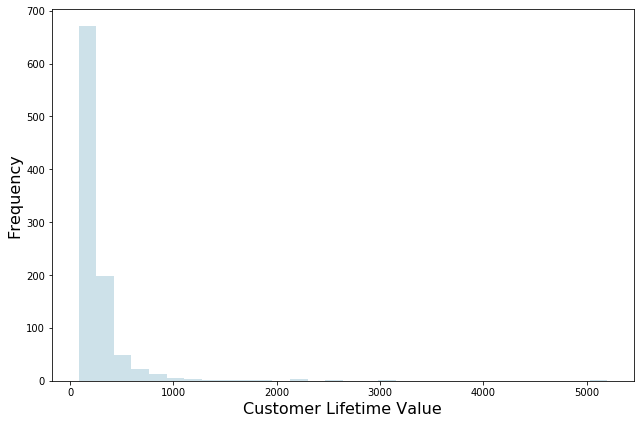

In [277]:
# Histogram for distribution of initial cohort size
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['CLTV'], kde=False, bins=30, color='#84B4C8')

ax.set_xlabel("Customer Lifetime Value",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='CLTV_hist', dpi=150)
plt.show()

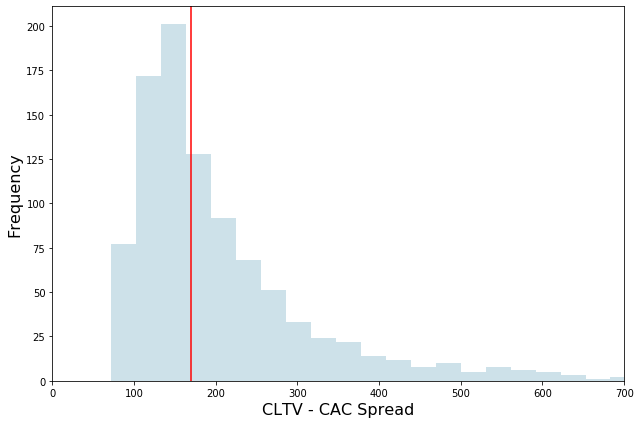

In [278]:
# Histogram for distribution of CLTV-CAC Spread
fig, ax = plt.subplots(figsize=(9,6))
sns.distplot(plot_df['Spread'], kde=False, bins=150, color='#84B4C8')
plt.axvline(x=plot_df['Spread'].median(), color='red')
plt.xlim(0, 700)

ax.set_xlabel("CLTV - CAC Spread",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.tight_layout()

plt.savefig(fname='spread_hist', dpi=150)
plt.show()

In [279]:
sum(plot_df['Spread'] > plot_df['CAC'].median())/plot_df.shape[0]

1.0

In [280]:
np.median(plot_df['Spread'])

169.95651665977206

In [217]:
np.quantile(plot_df['CAC'], 0.95)

72.90757804686004

In [218]:
np.quantile(plot_df['CAC'], 0.05)

11.202235455623978